# Tidy Tuesday: MTA Art Catalog
**July 22, 2025**

Today's goal is to remake the visuals in the [dashboard](https://data.ny.gov/stories/s/u2va-fuuf).

## Prepare

In [1]:
# Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
mta_art = pd.read_csv('mta_art.csv')
station_lines = pd.read_csv('station_lines.csv')

### Clean the data
**Part 1: `mta_art`**

In [3]:
mta_art.head()

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link
0,NYCT,Clark St,"2,3",Ray Ring,Clark Street Passage,1987,Terrazzo floor tile,The first model that Brooklyn-born artist Ray ...,https://new.mta.info/agency/arts-design/collec...
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,Bronze - polychromed,"The Open Secret, in the 125th Street and Lexin...",https://new.mta.info/agency/arts-design/collec...
2,NYCT,Astor Pl,6,Milton Glaser,Untitled,1986,Porcelain enamel murals,"Milton Glaser, best known for his work in grap...",https://new.mta.info/agency/arts-design/collec...
3,NYCT,Kings Hwy,"B,Q",Rhoda Andors,Kings Highway Hieroglyphs,1987,Porcelain Enamel Murals on Steel,The artist discusses her work: ÒIf public art...,https://new.mta.info/agency/arts-design/collec...
4,NYCT,Newkirk Av,"B,Q",David Wilson,Transit Skylight,1988,Zinc-glazed Apolycarbonate skylight,"The artist recalls, ÒAbout the same time that ...",https://new.mta.info/agency/arts-design/collec...


In [4]:
print('1: Data types')
print(mta_art.dtypes)
print()
print()
print('2: Check NAs')
print(mta_art.isna().sum())

1: Data types
agency             object
station_name       object
line               object
artist             object
art_title          object
art_date            int64
art_material       object
art_description    object
art_image_link     object
dtype: object


2: Check NAs
agency             0
station_name       0
line               3
artist             0
art_title          0
art_date           0
art_material       0
art_description    3
art_image_link     5
dtype: int64


1: Data types look good.

2: The NAs are of no concern. An NA in `line` means that 3 of the artwork were not displayed at a line. The NAs for `art_description` and `art_image_link` are also not important as they do not contain relevant data for the objectives today.

**Part 2: `station_lines`**

In [5]:
station_lines

,agency,station_name,line
0,NYCT,Clark St,2
1,NYCT,Clark St,3
2,NYCT,125 St,4
3,NYCT,125 St,5
4,NYCT,125 St,6
...,...,...,...
715,NYCT,Fulton St,4
716,NYCT,Fulton St,5
717,NYCT,5 Av/53 St,E
718,NYCT,5 Av/53 St,M


In [6]:
print('1: Data types')
print(station_lines.dtypes)
print()
print()
print('2: Check NAs')
print(station_lines.isna().sum())

1: Data types
agency          object
station_name    object
line            object
dtype: object


2: Check NAs
agency          0
station_name    0
line            0
dtype: int64


Everything looks good here.\
Check the values.

In [7]:
station_lines.line.value_counts()

line
2                                46
Q                                37
N                                36
6                                35
A                                33
R                                33
3                                33
5                                32
4                                30
1                                27
D                                26
B                                26
M                                25
F                                25
J                                24
7                                22
C                                20
S                                19
E                                18
Z                                17
City Terminal Zone               16
Port Jefferson                   15
New Haven                        12
L                                12
Harlem                           11
Hudson                           11
W                                10
Babylon                

From above, there appears to be some leading whitespaces which is causing some issues with reading. Get rid of them.

In [8]:
station_lines['line'] = station_lines['line'].str.lstrip() # To remove leading white space
station_lines.line.value_counts()

line
2                                48
Q                                39
5                                38
N                                37
6                                35
R                                35
3                                35
A                                33
4                                32
D                                29
1                                28
M                                28
F                                27
B                                27
J                                26
C                                24
7                                23
S                                21
Z                                19
E                                18
City Terminal Zone               16
Port Jefferson                   15
W                                13
L                                12
New Haven                        12
Hudson                           11
Harlem                           11
Babylon                

Looks cleaner and will now allow proper reading / grouping.

## Visualize
### P1: Number of rows by Art Material

In [9]:
materials = mta_art['art_material'].value_counts().reset_index(name='counts')
materials

,art_material,counts
0,Faceted glass,33
1,Glass mosaic,31
2,Laminated glass,26
3,Laminated Glass,17
4,Glass Mosaic,16
...,...,...
178,"Glass, steel, ceramic ink",1
179,Faceted glass throughout complex; glass mosaic...,1
180,"Bronze sculptures on token booth, railings, an...",1
181,"Glass, stone and marble mosaic",1


C:\Users\njlee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


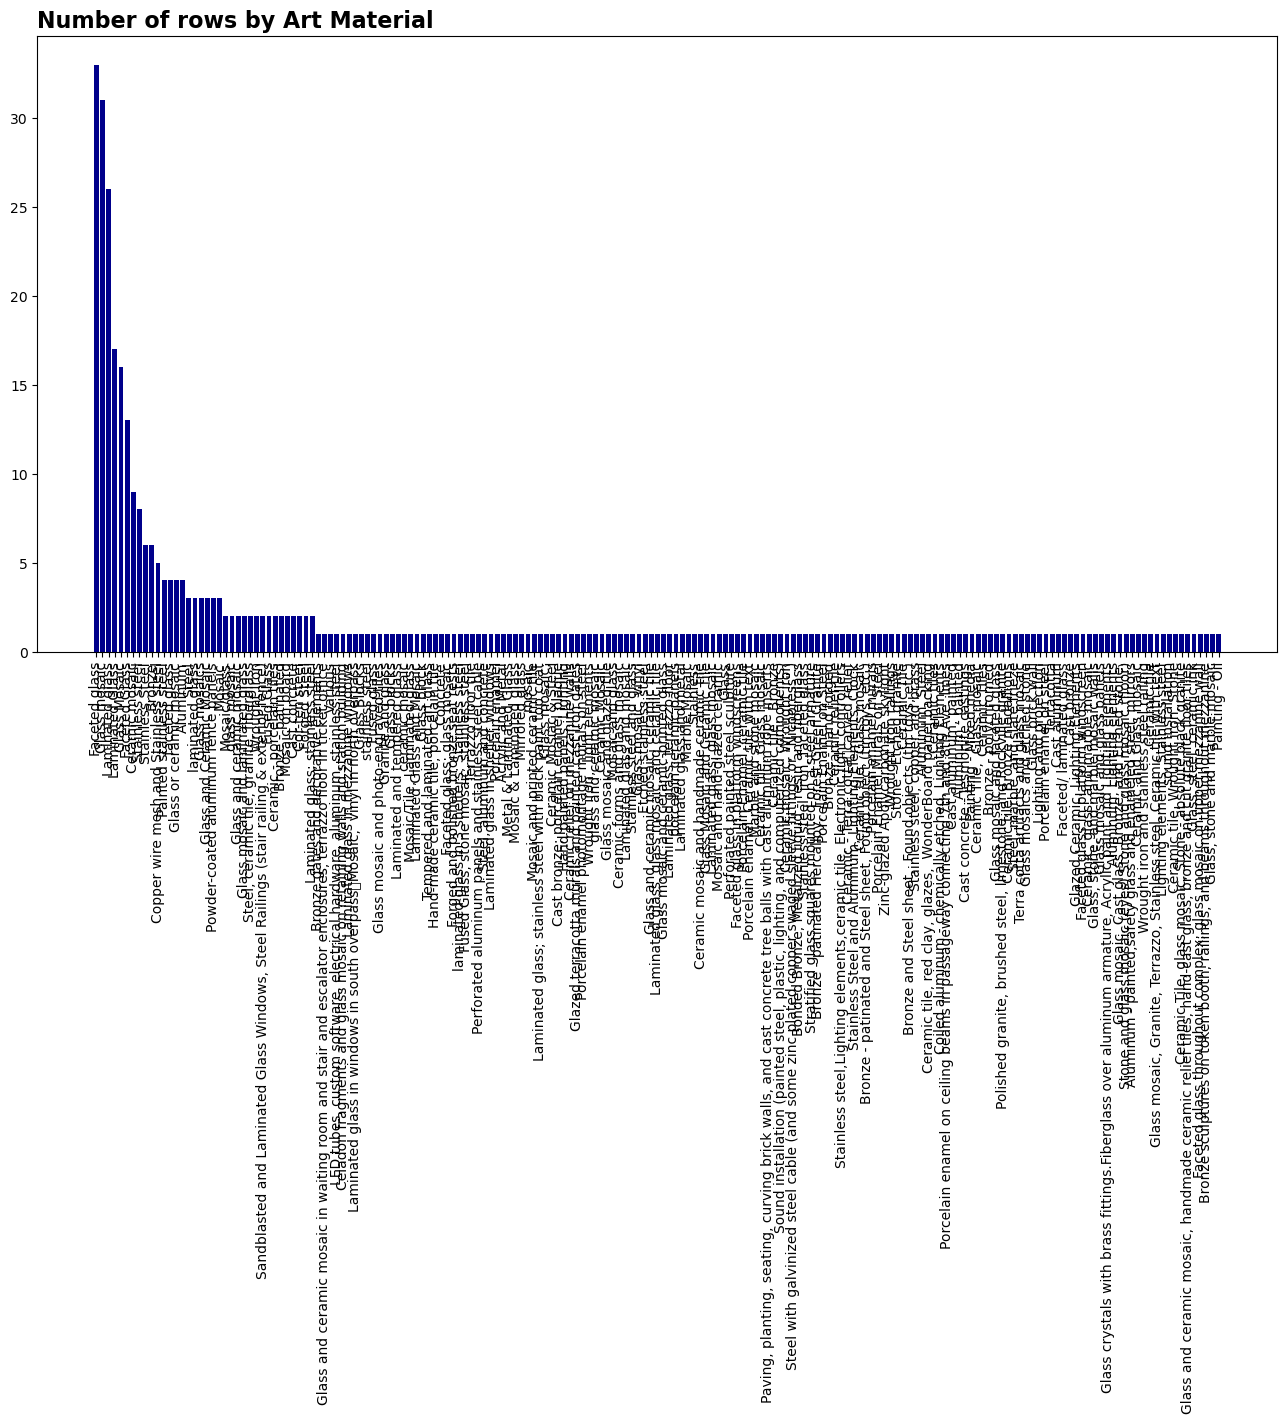

In [10]:
plt.figure(figsize=(16,8))
plt.bar(materials['art_material'], materials['counts'], color='darkblue')
plt.tick_params(axis='x', labelrotation=90)
plt.title('Number of rows by Art Material', loc='left', fontsize=16, weight='bold')

plt.show()

Not going to lie, this is not an optimal way to display. Pivot the goal to recreating the dashboard on Power BI instead...